In [1]:
import os
import numpy as np
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1235)
   np.random.seed(1235)

reset_random_seeds()

In [2]:
# !pip install sklearn
# !pip install nltk
# !pip install textblob

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.svm import LinearSVC

from nltk.classify import svm
nltk.download('stopwords')

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import gc

from nltk.corpus import stopwords
from textblob import TextBlob 
from textblob import Word
import string
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Code for creating Naive Bayes Classifier for textual data
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

import string
table = str.maketrans('', '', string.punctuation)

In [5]:
twitter_df = pd.read_csv("data/clean/git_twitter.csv", index_col = "Unnamed: 0")
reddit_df = pd.read_csv("data/clean/reddit.csv", index_col = "Unnamed: 0")
reddit_df = reddit_df.dropna()

In [6]:
num_to_sample = np.sum(reddit_df['Label']==1)
df_zero = reddit_df.query("Label==0").sample(n = num_to_sample, random_state=1)
df_one = reddit_df.query("Label==1")
reddit_df = df_zero.append(df_one, ignore_index=True)
reddit_df = reddit_df.sample(frac = 1)

In [7]:
twitter_df['Data'] = twitter_df['Data'].str.lower()
reddit_df['Data'] = reddit_df['Data'].str.lower()
twitter_df['Data'] = twitter_df['Data'].apply(lambda x: ' '.join([word.translate(table) for word in x.split()]))
twitter_df['Data'] = twitter_df['Data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
twitter_df['Data'] = twitter_df['Data'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))
reddit_df['Data'] = reddit_df['Data'].apply(lambda x: ' '.join([word.translate(table) for word in x.split()]))
reddit_df['Data'] = reddit_df['Data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
reddit_df['Data'] = reddit_df['Data'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

In [8]:
merged_df = twitter_df.append(reddit_df, ignore_index="true")

In [9]:
merged_df = merged_df.dropna()

In [10]:
(train, test) = train_test_split(reddit_df, test_size=0.2, random_state=42, shuffle=True)
(train, val) = train_test_split(train, test_size=0.2, random_state=42, shuffle=True)

In [11]:
train_sentences = train['Data'].to_numpy()
test_sentences = test['Data'].to_numpy()
val_sentences = val['Data'].to_numpy()

train_labels = train['Label'].to_numpy()
test_labels = test['Label'].to_numpy()
val_labels = val['Label'].to_numpy()

In [12]:
train.head()

,Label,Data
3908,0,give fuck karma notic get vote discuss tend vo...
9702,1,see retard peopl game forum subreddit reeeeeee...
2930,0,agre dont hire sjw
1040,0,send girl colleg post ass pictur instagram joi...
3614,0,httpswwwyoutubecomwatchvenscsdosodehttpswwwyou...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# # Create feature vectors
# vectorizer = TfidfVectorizer(min_df = 5,
#                              max_df = 0.8,
#                              sublinear_tf = True,
#                              use_idf = True)
# train_vectors = vectorizer.fit_transform(train['Data'])
# test_vectors = vectorizer.transform(test['Data'])


pipeline = Pipeline(
    [
        ("vect", CountVectorizer(min_df = 5,
                             max_df = 0.8)),
        ("tfidf", TfidfTransformer(sublinear_tf = True,
                             use_idf = True))
    ]
)
train_vectors = pipeline.fit_transform(train['Data'])
test_vectors = pipeline.transform(test['Data'])

vec = pipeline.named_steps['vect']
features = vec.get_feature_names()

In [16]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, train['Label'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Size of train set: ",(len(train.index)), "Size of test set:", (len(test.index)))
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(test['Label'], prediction_linear, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])
print("-------------")
acc = accuracy_score(test['Label'], prediction_linear)
print("f1", f1_score(test['Label'], prediction_linear))
print("acc", acc)
print(report)

Size of train set:  6726 Size of test set: 2102
Training time: 11.192478s; Prediction time: 2.016421s
positive:  {'precision': 0.9278897136797455, 'recall': 0.8373205741626795, 'f1-score': 0.8802816901408451, 'support': 1045}
negative:  {'precision': 0.8533218291630716, 'recall': 0.935666982024598, 'f1-score': 0.8925992779783394, 'support': 1057}
-------------
f1 0.8802816901408451
acc 0.8867745004757374
{'0': {'precision': 0.8533218291630716, 'recall': 0.935666982024598, 'f1-score': 0.8925992779783394, 'support': 1057}, '1': {'precision': 0.9278897136797455, 'recall': 0.8373205741626795, 'f1-score': 0.8802816901408451, 'support': 1045}, 'accuracy': 0.8867745004757374, 'macro avg': {'precision': 0.8906057714214086, 'recall': 0.8864937780936387, 'f1-score': 0.8864404840595923, 'support': 2102}, 'weighted avg': {'precision': 0.8903929230355379, 'recall': 0.8867745004757374, 'f1-score': 0.8864756436823443, 'support': 2102}}


In [ ]:

#old code finished, trying new things

In [17]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [18]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [19]:
top_feats_in_doc(train_vectors, features, 1, 5)

,feature,tfidf
0,predominantli,0.408933
1,game,0.395294
2,forum,0.369080
3,player,0.360487
4,subreddit,0.322534


In [20]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=10):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [21]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [22]:
pp = top_feats_by_class(train_vectors, train['Label'], features,min_tfidf=0.01, top_n=10 )

In [23]:
from matplotlib import pyplot as plt
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

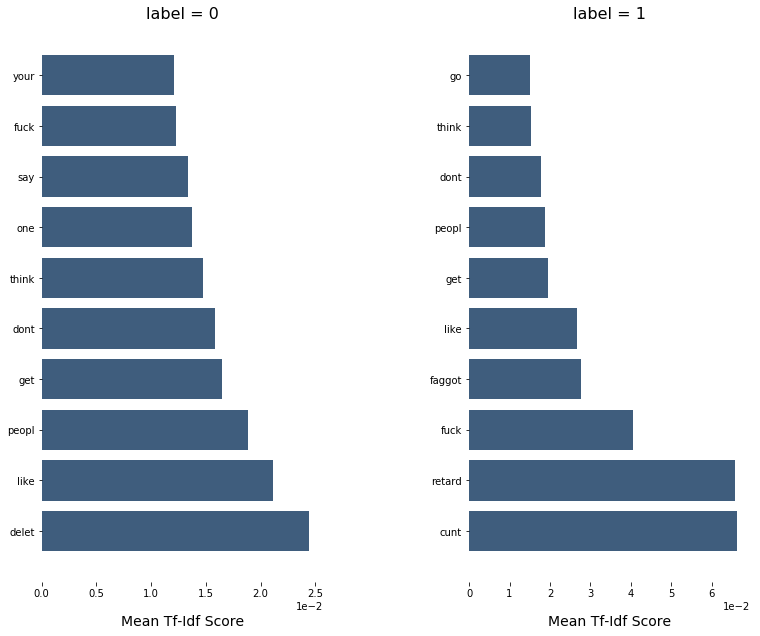

In [24]:
plot_tfidf_classfeats_h(pp)

In [25]:
parameters = {
    "vect__max_df": (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    "clf__max_iter": (20,),
    "clf__alpha": (0.00001, 0.000001),
    "clf__penalty": ("l2", "elasticnet"),
    # 'clf__max_iter': (10, 50, 80),
}

In [26]:
from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_jobs = 6)
grid.fit(train_vectors, train['Label'])

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done  72 out of  72 | elapsed:  3.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=6,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [27]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [28]:
grid_predictions = grid.predict(test_vectors)
print(classification_report(test['Label'], grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1057
           1       0.93      0.84      0.88      1045

    accuracy                           0.89      2102
   macro avg       0.89      0.89      0.89      2102
weighted avg       0.89      0.89      0.89      2102



In [29]:
from sklearn.metrics import f1_score
report = classification_report(test['Label'], grid_predictions, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])
print("-------------")
acc = accuracy_score(test['Label'], grid_predictions)
print(f1_score(test['Label'], grid_predictions))
print(acc)

positive:  {'precision': 0.9278897136797455, 'recall': 0.8373205741626795, 'f1-score': 0.8802816901408451, 'support': 1045}
negative:  {'precision': 0.8533218291630716, 'recall': 0.935666982024598, 'f1-score': 0.8925992779783394, 'support': 1057}
-------------
0.8802816901408451
0.8867745004757374
